# 대구 교통사고 예측 AI

아래의 코드 실행 후 Runtime Restart

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,090 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and dire

In [3]:
%pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os, random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import lightgbm as lgb

import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

In [3]:
from autogluon.tabular import TabularPredictor, TabularDataset
import autogluon

In [5]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    autogluon.core.utils.random.seed(seed)

SEED = 42
seed_everything(SEED) # Seed 고정

In [6]:
df_train = pd.read_csv('./final_train.csv')
df_test = pd.read_csv('./final_test.csv')

# Data Preprocess & Modeling

In [26]:
X_train_df = df_train[df_test.columns]
y_train_df = df_train['ECLO']
X_test_df = df_test.copy()

In [215]:
X_train_df.columns

Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '구', '동', '설치개수', '주차구획수',
       '주차기본시간', '주차기본요금', '추가단위시간', '추가단위요금', '1일주차권요금적용시간', '1일주차권요금',
       '월정기권요금', '위도', '경도', '공영', '민영', '노상', '노외', '1', '2', '3', '평일운영시간',
       '토요일운영시간', '공휴일운영시간', '무료', '유료', '혼합', '주차장수', 'camera_all',
       'camera_1', 'camera_2', 'camera_4', 'camera_99', 'protect_all',
       'protect_1', 'protect_2', 'protect_99', 'speed_limit', 'speed_min',
       'speed_max', '보호구역도로폭_카테고리', '어린이보호구역 개수', '어보구CCTV설치비율', '하차', '승차',
       'count', 'occrrnc_cnt_sum', 'caslt_cnt_sum', 'dth_dnv_cnt_sum',
       'se_dnv_cnt_sum', 'sl_dnv_cnt_sum', 'wnd_dnv_cnt_sum', 'total', '연',
       '월', '일', '시간', '월일'],
      dtype='object')

In [27]:
drop_cols = ['ID','연','월','일','주차기본시간','주차기본요금','추가단위시간','추가단위요금','1일주차권요금적용시간','1일주차권요금','월정기권요금','위도','경도','protect_1']

X_train_df = X_train_df.drop(columns=drop_cols)
X_test_df = X_test_df.drop(columns=drop_cols)

In [217]:
X_train_df.columns == X_test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [28]:
sc = MinMaxScaler()
numeric_cols = X_train_df.select_dtypes(float).columns

X_train_df[numeric_cols] = sc.fit_transform(X_train_df.select_dtypes(float))
X_test_df[numeric_cols] = sc.transform(X_test_df.select_dtypes(float))

In [29]:
X_train_df.isna().sum()

요일                    0
기상상태                  0
도로형태                  0
노면상태                  0
사고유형                  0
구                     0
동                     0
설치개수               2799
주차구획수              6543
공영                 6543
민영                 6543
노상                 6543
노외                 6543
1                  6543
2                  6543
3                  6543
평일운영시간             6543
토요일운영시간            6543
공휴일운영시간            6543
무료                 6543
유료                 6543
혼합                 6543
주차장수               6543
camera_all         1572
camera_1           1572
camera_2           1572
camera_4           1572
camera_99          1572
protect_all        1572
protect_2          1572
protect_99         1572
speed_limit        2512
speed_min          2512
speed_max          2512
보호구역도로폭_카테고리          0
어린이보호구역 개수            0
어보구CCTV설치비율           0
하차                    0
승차                    0
count              7819
occrrnc_cnt_sum    7819
caslt_cnt_sum   

**NaN 값 채우기 기준**

`주차장`
- 주차구획수, 주차장수 -> mean
- 공영, 민영 -> 0
- 노상, 노외 -> 0
- 1, 2, 3 (급지) -> 0
- 평일운영시간 -> mean
- 토요일운영시간, 공휴일운영시간 -> 0
- 무료, 유료 -> 0

`CCTV`
- speed_limit, min, max -> most_frequent
- 나머지 -> 0

`보안등`
- ?

`보호구역`
- ?

In [220]:
X_train_df.select_dtypes('object').columns

Index(['요일', '기상상태', '도로형태', '노면상태', '사고유형', '구', '동', '월일'], dtype='object')

In [30]:
le_cols = ['요일', '기상상태', '도로형태', '노면상태', '사고유형', '구', '동']
le = LabelEncoder()

for col in le_cols:
    X_train_df[col] = le.fit_transform(X_train_df[col])
    X_test_df[col] = le.transform(X_test_df[col])

In [31]:
mean_fill_cols = ['주차구획수','주차장수','평일운영시간']

X_train_df[mean_fill_cols] = X_train_df[mean_fill_cols].fillna(X_train_df[mean_fill_cols].mean())
X_test_df[mean_fill_cols] = X_test_df[mean_fill_cols].fillna(X_train_df[mean_fill_cols].mean())

In [32]:
mode_fill_cols = ['speed_limit','speed_min','speed_max']

X_train_df[mode_fill_cols] = X_train_df[mode_fill_cols].fillna(X_train_df[mode_fill_cols].mode())
X_test_df[mode_fill_cols] = X_test_df[mode_fill_cols].fillna(X_train_df[mode_fill_cols].mode())

In [33]:
X_train_df.fillna(0, inplace=True)
X_test_df.fillna(0, inplace=True)

## 변수 중요도 파악하기

In [208]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df.values

In [209]:
y_train = np.log1p(y_train)

In [210]:
lgbm = lgb.LGBMRegressor(n_estimators=1000)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 39609, number of used features: 50
[LightGBM] [Info] Start training from score 1.633697


LGBMRegressor(n_estimators=1000)

In [211]:
fi_df = pd.DataFrame(lgbm.feature_importances_/np.sum(lgbm.feature_importances_),
             index=X_train_df.columns).sort_values(0)

<Axes: xlabel='0'>

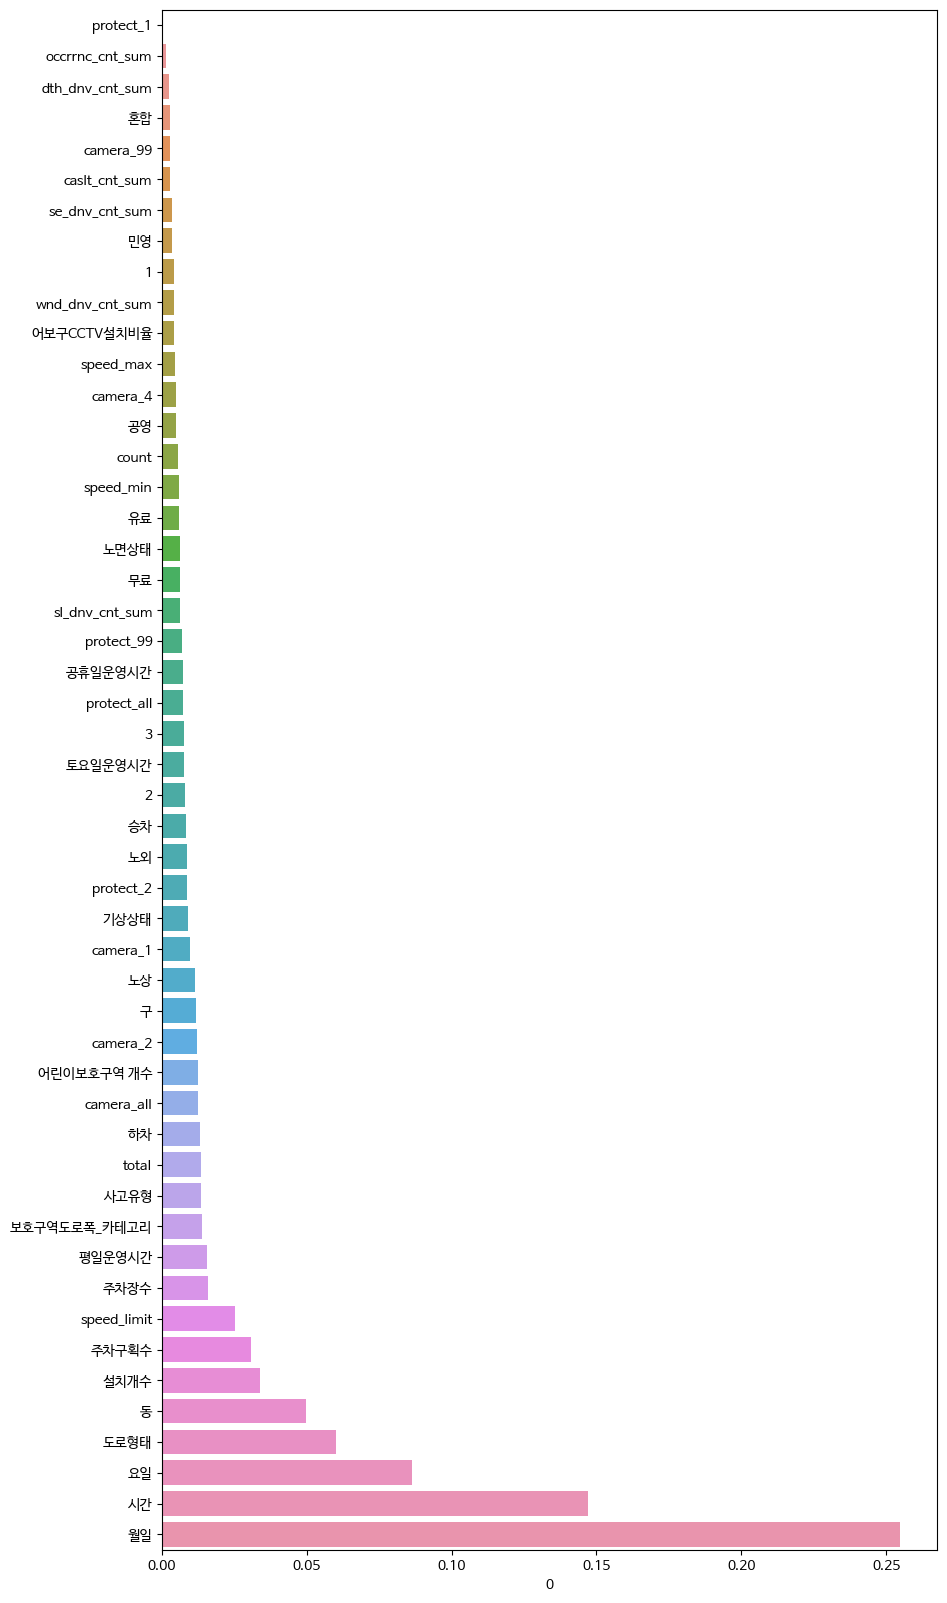

In [212]:
plt.figure(figsize=(10,20))
sns.barplot(y=fi_df.index,x=0,data=fi_df)

# AutoGluon

In [34]:
X_train = X_train_df.copy()
X_test = X_test_df.copy()
y_train = y_train_df.copy()

In [35]:
X_train = pd.concat([X_train,y_train],axis=1)

In [ ]:
# log scaling 적용 
X_train['ECLO'] = np.log1p(X_train['ECLO'])

In [37]:
trainset = TabularDataset(X_train)
testset = TabularDataset(X_test)

In [38]:
predictor = TabularPredictor(label='ECLO', problem_type='regression', eval_metric='rmse').fit(trainset, presets='high_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20231210_131728"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231210_131728/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20231210_131728/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

In [39]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.444521,root_mean_squared_error,7.824335,125.909182,0.001194,1.602207,2,False,51
1,CatBoost_r50_BAG_L1,-0.444767,root_mean_squared_error,0.228618,15.201113,0.228618,15.201113,1,False,31
2,CatBoost_r137_BAG_L1,-0.444807,root_mean_squared_error,0.179779,48.007880,0.179779,48.007880,1,False,21
3,CatBoost_r69_BAG_L1,-0.444835,root_mean_squared_error,0.126453,21.571652,0.126453,21.571652,1,False,35
4,XGBoost_r89_BAG_L1,-0.444836,root_mean_squared_error,1.308424,7.746058,1.308424,7.746058,1,False,27
...,...,...,...,...,...,...,...,...,...,...
97,CatBoost_r177_BAG_L1_FULL,NaN,root_mean_squared_error,NaN,2.057628,NaN,2.057628,1,True,63
98,CatBoost_r167_BAG_L1_FULL,NaN,root_mean_squared_error,NaN,2.049044,NaN,2.049044,1,True,95
99,CatBoost_r13_BAG_L1_FULL,NaN,root_mean_squared_error,NaN,10.263465,NaN,10.263465,1,True,74
100,CatBoost_r137_BAG_L1_FULL,NaN,root_mean_squared_error,NaN,4.187310,NaN,4.187310,1,True,72


In [41]:
pred = predictor.predict(testset)

In [42]:
pred = np.exp(pred) - 1

In [43]:
pred.min()

2.5304832

In [ ]:
pred = np.where(pred < 0, 0, pred)

<Axes: ylabel='Frequency'>

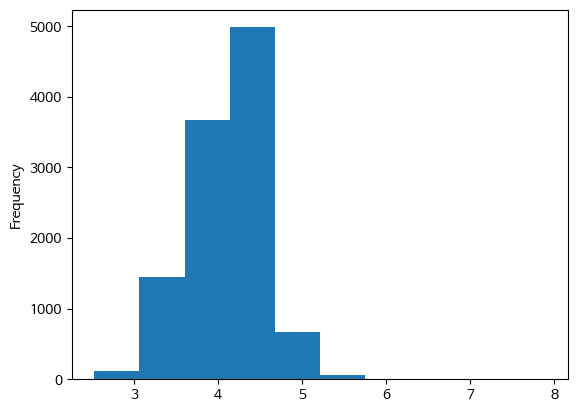

In [44]:
pred.plot(kind='hist')

In [45]:
submit = pd.read_csv('./sample_submission.csv')
submit.loc[X_test.index, 'ECLO'] = pred
submit

,ID,ECLO
0,ACCIDENT_39609,4.168595
1,ACCIDENT_39610,3.906022
2,ACCIDENT_39611,5.154377
3,ACCIDENT_39612,4.647350
4,ACCIDENT_39613,4.625804
...,...,...
10958,ACCIDENT_50567,5.176826
10959,ACCIDENT_50568,4.504848
10960,ACCIDENT_50569,4.657367
10961,ACCIDENT_50570,4.617970


In [46]:
submit.to_csv('./submit/20231210-2334.csv', index=False)